In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import scipy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
music_data = genfromtxt('year-prediction-msd-train.txt', delimiter=',')

In [13]:
# Split year values from the array
music_y = music_data[:, 0]

# Split the first timbre average as feature
music_x = music_data[:, np.newaxis, 2]

In [14]:
# Split the data using train_test_split (training data and validation, considering we already have a testing set)
music_x_train, music_x_val, music_y_train, music_y_val =  train_test_split(music_x, music_y, test_size=0.05, random_state=0)

music_x_train.shape, music_x_val.shape, music_y_train.shape, music_y_val.shape

((440529, 1), (23186, 1), (440529,), (23186,))

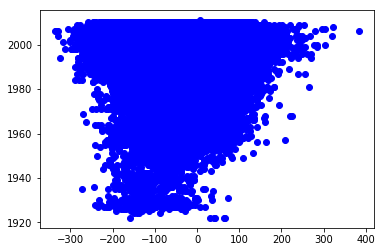

In [15]:
plt.scatter(music_x_train, music_y_train,  color='blue')
plt.show()

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(music_x_train, music_y_train)
# Make predictions using the testing set
music_y_pred = regr.predict(music_x_val)

In [19]:
# The coefficients
print('Estimated intercept: ', regr.intercept_)

# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(music_y_val, music_y_pred))

Estimated intercept:  1998.38397712
Coefficients:  [ 0.0048663]
Mean squared error: 119.63


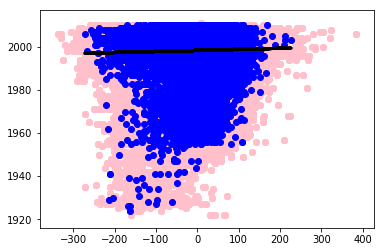

In [22]:
plt.scatter(music_x_train, music_y_train,  color='pink')
plt.scatter(music_x_val, music_y_val,  color='blue')
plt.plot(music_x_val, music_y_pred, color='black', linewidth=3)

plt.show()